In [1]:
from astropy.io import fits
import numpy as np
import os,sys
from astropy.cosmology import Planck15
sys.path.append('Images/RealSim/')
from ObsRealism_HST import *
import hdf52_fits_MPhys_modified_26_10 as grabber
from glob import glob

In [2]:
subhalos = [[0, 98], [373377, 93], [0, 95], [115568, 33], [0, 33]]
notes = ['recent major merger', 'recent major merger']
FITS_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/FITS_11_04v2_dir/'

In [3]:
for subhalo in subhalos:
    grabber.grabFITS(subhalo[0], subhalo[1], FITS_dir)

Writing final output to /home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/FITS_dir/SFID_0000000_SNAP_98.fits
Time: 0:00:03.082644
Read merger table from /home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/DF_dir/objects_master_22_10_28.parquet
Time: 0:00:03.689327
Constructed header
Time: 0:00:04.365504
wget --retry-connrefused -O /home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/HDF5_dir/98-0-wfc3_ir_f160w-0,1.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/0/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,1"
wget --retry-connrefused -O /home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/HDF5_dir/98-0-wfc3_ir_f160w-0,2.hdf5 --header="API-Key: 7441604020b774

/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/HDF5_dir/98-0-wfc3_ir_f160w-0,1.hdf5: Permission denied
/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/HDF5_dir/98-0-wfc3_ir_f160w-0,2.hdf5: Permission denied
/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/HDF5_dir/98-0-wfc3_ir_f160w-1,2.hdf5: Permission denied


PermissionError: [Errno 13] Permission denied: '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/FITS_dir/SFID_0000000_SNAP_98.fits'

In [8]:
output_path = '/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/'
bands =  ['wfc3_ir_f160w','wfc3_uvis_f438w','wfc3_uvis_f814w','wfc_acs_f814w']
axes = ['0,1', '0,2', '1,2']
CCD_scale = {bands[0]: 0.128, 
             bands[1]: 0.039,
             bands[2]: 0.039,
             bands[3]: 0.05}

FWHM = {bands[0]: 0.16, 
        bands[1]: 0.070,
        bands[2]: 0.074,
        bands[3]: 0.1}

common_args = { 
                'redshift'      : 0.05,  # mock observation redshift
                'rebin_to_CCD'  : True,  # rebin to CCD angular scale
                'CCD_scale'     : 0.128, # 0.128 for IR # CCD angular scale in [arcsec/pixel]
                'add_false_sky' : False,  # add gaussian sky
                'false_sky_sig' : 24.2,  # gaussian sky standard dev [AB mag/arcsec2]
                'add_false_psf' : True,  # convolve with gaussian psf
                'false_psf_fwhm': 0.16, #IR 160W,    gaussian psf FWHM [arcsec]
                'add_poisson'   : False,  # add poisson noise to galaxy
                'add_sdss_sky'  : False,  # insert into real SDSS sky (using sdss_args)
                'add_sdss_psf'  : False, # convolve with real SDSS psf (using sdss_args)
              }

def genarateRealisedImages(subhaloID, snap):
    
    imgList = list(sorted(glob(FITS_dir + 'SFID_{}_SNAP_{}*.fits'.format(subhaloID,snap))))
    img = 
    
    for _imgName in imgList:
        # get redshift from FITS header
        common_args['redshift'] = fits.getheader(_imgName)['HIERARCH redshift']
        
        common_args['CCD_scale'] = CCD_scale[fits.getheader(_imgName)['HIERARCH band']]
        common_args['false_psf_fwhm'] = FWHM[fits.getheader(_imgName)['HIERARCH band']]
        print(common_args['CCD_scale'], common_args['false_psf_fwhm'])
        # set holder for output names
        _outName = _imgName.replace(FITS_dir,output_path).replace('.fits','SemiReal.fits')
        
        # skip image if output already exists
        ##if os.access(_outName,0):continue

        sdss_args = 0

        keys = []
        for key in fits.getheader(_imgName).keys():
            keys.append(key)

        if 'CDELT1' not in keys:
            with fits.open(_imgName, mode='update') as hdul:
                CDELT1 = fits.getheader(_imgName)['HIERARCH stellar_half_mass_radius'] * fits.getheader(_imgName)['HIERARCH size'] /(Planck15.H(0).value/100) / 1500 #npix

                hdul[0].header.append(('CDELT1', CDELT1 , 'kpc/pixel'))


        print(_imgName)
        band = fits.getheader(_imgName)['HIERARCH band']

        ObsRealism(_imgName,_outName,band=band,common_args=common_args,sdss_args=sdss_args)
        # Pass in size in kpc/pixel, calculate from header

In [9]:
import matplotlib.pyplot as plt

for subhalo in subhalos:
    genarateRealisedImages(subhalo[0], subhalo[1])

0.128 0.16
/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/FITS_dir/sfid_385886_snap_98_axes_0,1_band_wfc3_ir_f160w.fits

Raw image:
kpc_per_arcsec: 0.20511423208914095
kpc_per_pixel: 0.007048244962494224
arcsec_per_pixel: 0.03436253491874281
AB_magnitude: 10.835437774658203 at z=0.01
AB_Magnitude: -22.33988060625412

After CCD scaling:
kpc_per_arcsec: 0.20511423208914095
kpc_per_pixel: 0.026254621707410043
arcsec_per_pixel: 0.128
AB_magnitude: 10.83543731099169 at z=0.01
AB_Magnitude: -22.339881069920636

After Realism:
kpc_per_arcsec: 0.20511423208914095
kpc_per_pixel: 0.026254621707410043
arcsec_per_pixel: 0.128
AB_magnitude: 10.8356983029564 at z=0.01
AB_Magnitude: -22.339620077955924
0.039 0.07
/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/FITS_dir/sfid_385886_snap_98_axes_0,1_band_wfc3_uvis_f438w.fits

Raw image:
kpc_per_arcsec: 0.20511423208914095
kpc_per_pixel: 0.007048244962494224
arcsec_per_pixel: 0

KeyboardInterrupt: 

(402, 402)
(402, 402)
(402, 402)
(402, 402)
(402, 402)
(402, 402)
(402, 402)
(402, 402)
(402, 402)
(402, 402)
(402, 402)
(402, 402)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(1076, 1076)
(1076, 1076)
(1076, 1076)
(1076, 1076)
(1076, 1076)
(1076, 1076)
(1076, 1076)
(1076, 1076)
(1076, 1076)
(1076, 1076)
(1076, 1076)
(1076, 1076)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(51, 51)
(51, 51)
(51, 51)
(51, 51)
(51, 51)
(51, 51)
(51, 51)
(51, 51)
(51, 51)
(51, 51)
(51, 51)
(51, 51)


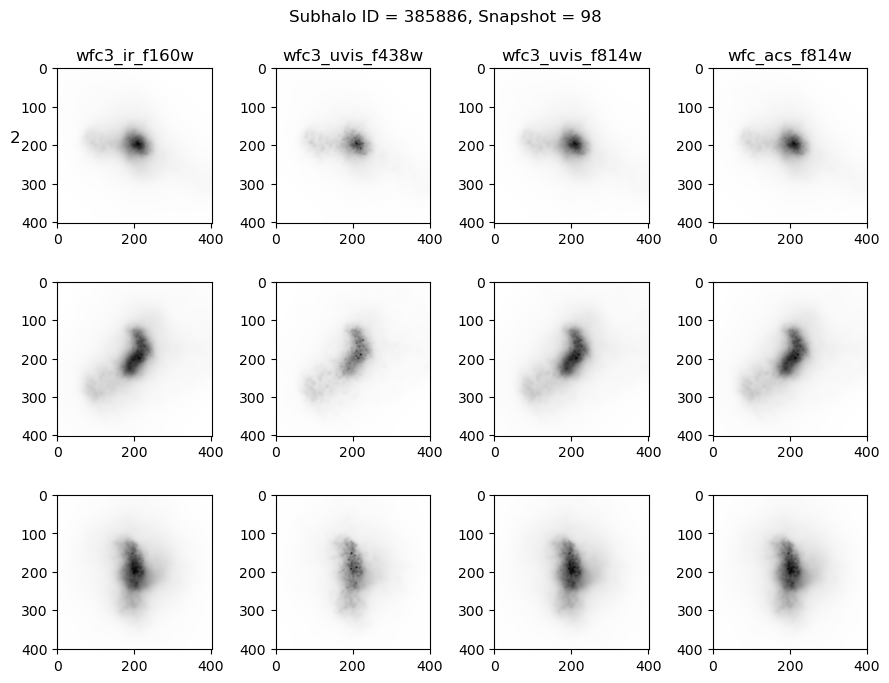

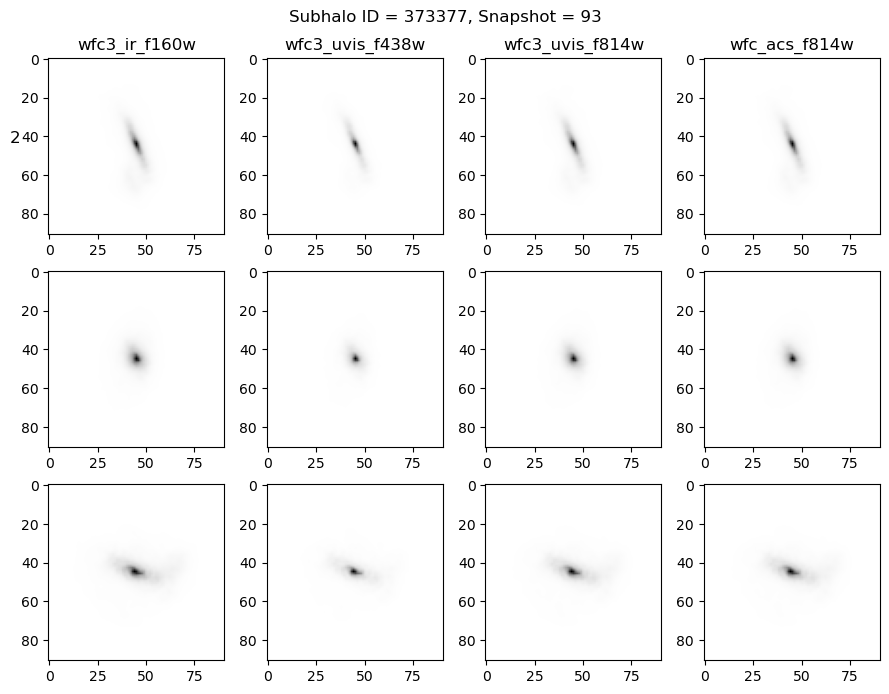

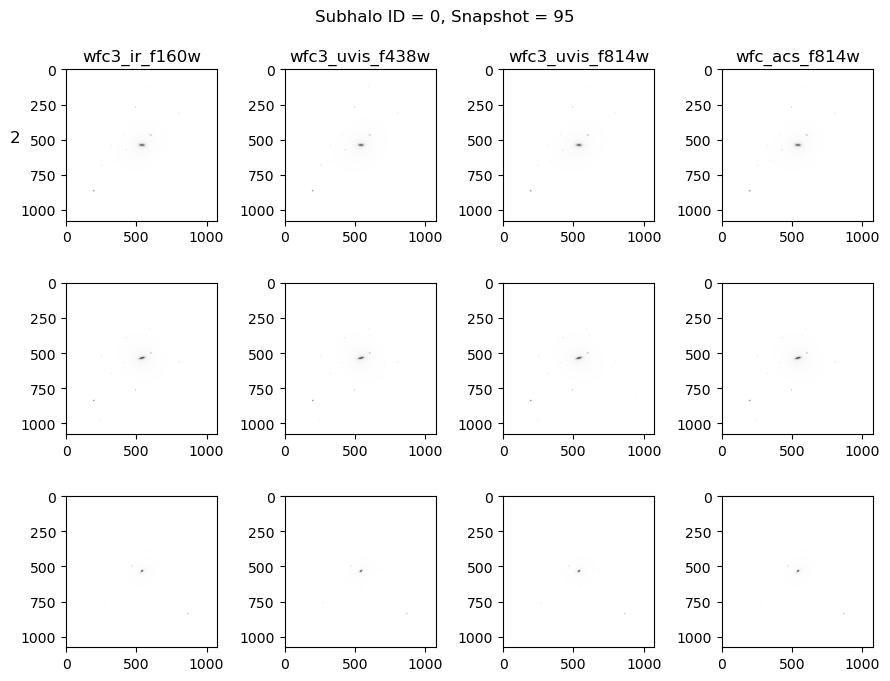

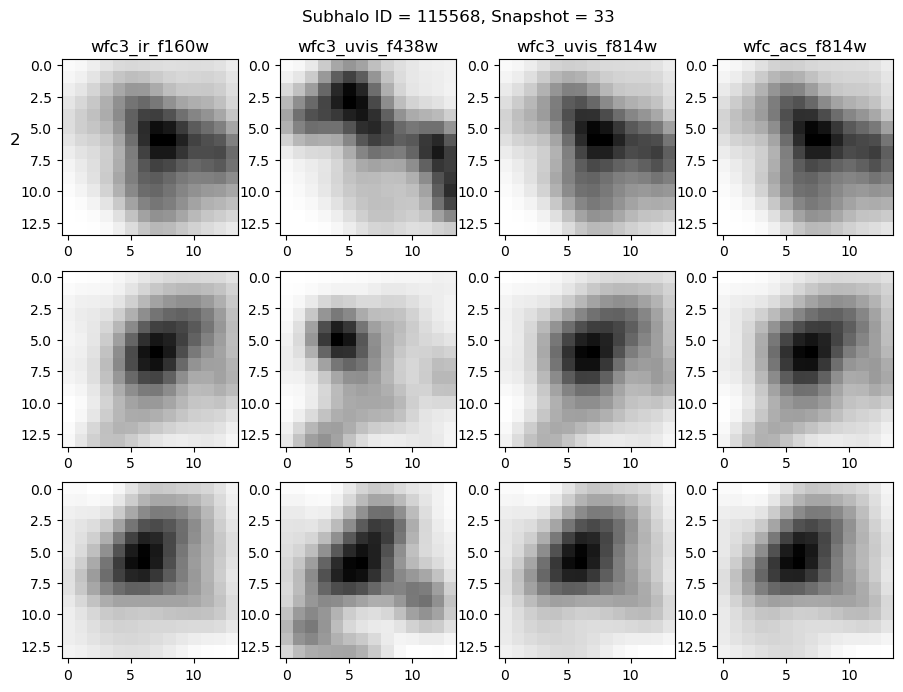

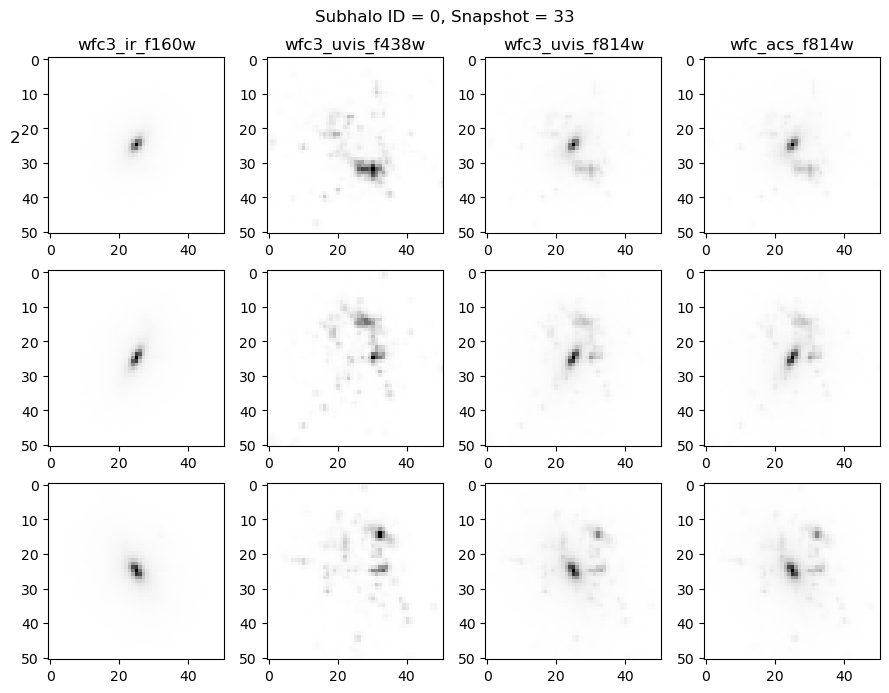

In [10]:
for subhalo in subhalos:    
    image_list = list(sorted(glob(output_path + '/sfid_{}_snap_{}*.fits'.format(subhalo[0],subhalo[1]))))
    fig = plt.figure(figsize = (9,7))
    ax = fig.subplots(3,4)

    for i in range(len(image_list)):

        data = fits.open(image_list[i])[0].data
        print(data.shape)
        ax[int(i/4),int(i%4)].imshow(data, cmap = 'gist_gray_r')
        #ax[int(i/4),int(i%4)].set_xticks([])
        #ax[int(i/4),int(i%4)].set_yticks([])

    for axs, band in zip(ax[0], bands):
        axs.set_title(band)

    for axs, axes in zip(ax[:,0], axes):
        axs.set_ylabel(axes, rotation=0, size='large')

    fig.suptitle('Subhalo ID = {}, Snapshot = {}'.format(subhalo[0], subhalo[1]))
    plt.tight_layout()

In [3]:
output_path = '/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/'
bands =  ['wfc3_ir_f160w','wfc3_uvis_f438w','wfc3_uvis_f814w','wfc_acs_f814w']
axes = ['0,1', '0,2', '1,2']
CCD_scale = {bands[0]: 0.128, 
             bands[1]: 0.039,
             bands[2]: 0.039,
             bands[3]: 0.05}

FWHM = {bands[0]: 0.16, 
        bands[1]: 0.070,
        bands[2]: 0.074,
        bands[3]: 0.1}

common_args = { 
                'redshift'      : 0.05,  # mock observation redshift
                'rebin_to_CCD'  : True,  # rebin to CCD angular scale
                'CCD_scale'     : 0.128, # 0.128 for IR # CCD angular scale in [arcsec/pixel]
                'add_false_sky' : False,  # add gaussian sky
                'false_sky_sig' : 24.2,  # gaussian sky standard dev [AB mag/arcsec2]
                'add_false_psf' : True,  # convolve with gaussian psf
                'false_psf_fwhm': 0.16, #IR 160W,    gaussian psf FWHM [arcsec]
                'add_poisson'   : False,  # add poisson noise to galaxy
                'add_sdss_sky'  : False,  # insert into real SDSS sky (using sdss_args)
                'add_sdss_psf'  : False, # convolve with real SDSS psf (using sdss_args)
              }

def genarateRealisedImages(subhaloID, snap):
    
    #imgList = list(sorted(glob(FITS_dir + 'SFID_{}_SNAP_{}*.fits'.format(subhaloID,snap))))
    img = FITS_dir + 'SFID_%07d_SNAP_%02d.fits' %(subhaloID,snap)
    
    # get redshift from FITS header
    common_args['redshift'] = fits.getheader(img)['HIERARCH redshift']
        
    # set holder for output names
    _outName = img.replace(FITS_dir,output_path).replace('.fits','SemiReal.fits')
        
    # skip image if output already exists
    #if os.access(_outName,0):

    sdss_args = 0

    ObsRealism(img,_outName,band=band,common_args=common_args,sdss_args=sdss_args)
        # Pass in size in kpc/pixel, calculate from header



In [6]:
galaxy = fits.open('/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/FITS_dir/SFID_98_SNAP_0385886.fits')

In [14]:
grabber.grabFITS(373377, 93, FITS_dir)

Writing final output to /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/FITS_dir/SFID_0373377_SNAP_93.fits
Time: 0:09:38.736031
Read merger table from /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/DF_dir/objects_master_22_10_25.parquet
Time: 0:09:39.744894
Constructed header
Time: 0:10:19.287758
wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc3_ir_f160w-0,1.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,1"


--2022-11-01 10:12:06--  https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,1
Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=313f8e0a4da3d0fa3ac9 [following]
--2022-11-01 10:12:06--  https://data-eu.tng-pro

 .......... .......... 20% 1.72M 1s
  1800K .......... .......... .......... .......... .......... 20%  223M 1s
  1850K .......... .......... .......... .......... .......... 21%  226M 1s
  1900K .......... .......... .......... .......... .......... 22% 44.0M 1s
  1950K .......... .......... .......... .......... .......... 22%  252M 1s
  2000K .......... .......... .......... .......... .......... 23%  245M 1s
  2050K .......... .......... .......... .......... .......... 23%  185M 1s
  2100K .......... .......... .......... .......... .......... 24%  264M 1s
  2150K .......... .......... .......... .......... .......... 24%  289M 1s
  2200K .......... .......... .......... .......... .......... 25%  246M 1s
  2250K .......... .......... .......... .......... .......... 26% 96.8M 1s
  2300K .......... .......... .......... .......... .......... 26%  160M 1s
  2350K .......... .......... .......... .......... .......... 27%  127M 1s
  2400K .......... .......... .......... .......... 

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc3_uvis_f438w-0,1.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f438w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,1"


Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f438w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=178862204a8f09d80423 [following]
--2022-11-01 10:12:07--  https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f438w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=178862204a8f09d80423
Connecting to wwwprox

..... .......... .......... .......... 16% 1.70M 1s
  1500K .......... .......... .......... .......... .......... 17% 85.6M 1s
  1550K .......... .......... .......... .......... .......... 18% 59.0M 1s
  1600K .......... .......... .......... .......... .......... 18% 67.2M 1s
  1650K .......... .......... .......... .......... .......... 19%  104M 1s
  1700K .......... .......... .......... .......... .......... 19% 99.9M 1s
  1750K .......... .......... .......... .......... .......... 20%  109M 1s
  1800K .......... .......... .......... .......... .......... 20% 97.9M 1s
  1850K .......... .......... .......... .......... .......... 21%  116M 1s
  1900K .......... .......... .......... .......... .......... 22%  102M 1s
  1950K .......... .......... .......... .......... .......... 22% 94.7M 1s
  2000K .......... .......... .......... .......... .......... 23% 92.8M 1s
  2050K .......... .......... .......... .......... .......... 23%  101M 1s
  2100K .......... .......... ......

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc3_uvis_f814w-0,1.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,1"


--2022-11-01 10:12:08--  https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,1
Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=9b6be7b2aa1472786c29 [following]
--2022-11-01 10:12:08--  https://data-eu.tng

 .......... .......... 19% 2.05M 1s
  1750K .......... .......... .......... .......... .......... 20%  106M 1s
  1800K .......... .......... .......... .......... .......... 20% 95.2M 1s
  1850K .......... .......... .......... .......... .......... 21% 89.2M 1s
  1900K .......... .......... .......... .......... .......... 22%  104M 1s
  1950K .......... .......... .......... .......... .......... 22%  111M 1s
  2000K .......... .......... .......... .......... .......... 23%  142M 1s
  2050K .......... .......... .......... .......... .......... 23%  130M 1s
  2100K .......... .......... .......... .......... .......... 24% 93.9M 1s
  2150K .......... .......... .......... .......... .......... 24% 96.7M 1s
  2200K .......... .......... .......... .......... .......... 25%  128M 1s
  2250K .......... .......... .......... .......... .......... 26% 91.2M 1s
  2300K .......... .......... .......... .......... .......... 26%  145M 1s
  2350K .......... .......... .......... .......... 

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc_acs_f814w-0,1.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc_acs_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,1"


--2022-11-01 10:12:09--  https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc_acs_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,1
Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc_acs_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=f5fe7976f3351c77f105 [following]
--2022-11-01 10:12:09--  https://data-eu.tng-pro

........ .......... .......... .......... 19% 1.77M 1s
  1750K .......... .......... .......... .......... .......... 20%  241M 1s
  1800K .......... .......... .......... .......... .......... 20%  247M 1s
  1850K .......... .......... .......... .......... .......... 21%  104M 1s
  1900K .......... .......... .......... .......... .......... 22%  179M 1s
  1950K .......... .......... .......... .......... .......... 22%  176M 1s
  2000K .......... .......... .......... .......... .......... 23%  188M 1s
  2050K .......... .......... .......... .......... .......... 23%  183M 1s
  2100K .......... .......... .......... .......... .......... 24%  183M 1s
  2150K .......... .......... .......... .......... .......... 24%  233M 1s
  2200K .......... .......... .......... .......... .......... 25%  190M 1s
  2250K .......... .......... .......... .......... .......... 26%  170M 1s
  2300K .......... .......... .......... .......... .......... 26%  238M 1s
  2350K .......... .......... ...

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc3_ir_f160w-0,2.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,2"


--2022-11-01 10:12:10--  https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,2
Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=eca394fdc232daa19751 [following]
--2022-11-01 10:12:10--  https://data-eu.tng-pro

.. .......... .......... 19% 2.37M 1s
  1750K .......... .......... .......... .......... .......... 20% 40.4M 1s
  1800K .......... .......... .......... .......... .......... 20%  143M 1s
  1850K .......... .......... .......... .......... .......... 21%  235M 1s
  1900K .......... .......... .......... .......... .......... 22%  283M 1s
  1950K .......... .......... .......... .......... .......... 22%  285M 1s
  2000K .......... .......... .......... .......... .......... 23% 47.4M 1s
  2050K .......... .......... .......... .......... .......... 23%  239M 1s
  2100K .......... .......... .......... .......... .......... 24%  244M 1s
  2150K .......... .......... .......... .......... .......... 24%  202M 1s
  2200K .......... .......... .......... .......... .......... 25%  267M 1s
  2250K .......... .......... .......... .......... .......... 26%  261M 1s
  2300K .......... .......... .......... .......... .......... 26%  310M 1s
  2350K .......... .......... .......... .........

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc3_uvis_f438w-0,2.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f438w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,2"


Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f438w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=b7b5785f0a24ecfaf2a6 [following]
--2022-11-01 10:12:11--  https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f438w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=b7b5785f0a24ecfaf2a6
Connecting to wwwprox

... .......... .......... .......... 19% 2.09M 1s
  1700K .......... .......... .......... .......... .......... 19% 88.8M 1s
  1750K .......... .......... .......... .......... .......... 20% 78.2M 1s
  1800K .......... .......... .......... .......... .......... 20%  124M 1s
  1850K .......... .......... .......... .......... .......... 21%  131M 1s
  1900K .......... .......... .......... .......... .......... 22%  143M 1s
  1950K .......... .......... .......... .......... .......... 22%  135M 1s
  2000K .......... .......... .......... .......... .......... 23%  100M 1s
  2050K .......... .......... .......... .......... .......... 23%  127M 1s
  2100K .......... .......... .......... .......... .......... 24%  113M 1s
  2150K .......... .......... .......... .......... .......... 24%  134M 1s
  2200K .......... .......... .......... .......... .......... 25%  148M 1s
  2250K .......... .......... .......... .......... .......... 26%  125M 1s
  2300K .......... .......... ........

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc3_uvis_f814w-0,2.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,2"


Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=17db977402fe31509640 [following]
--2022-11-01 10:12:12--  https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=17db977402fe31509640
Connecting to wwwprox

........ .......... .......... .......... 20% 1.77M 1s
  1800K .......... .......... .......... .......... .......... 20%  231M 1s
  1850K .......... .......... .......... .......... .......... 21% 99.5M 1s
  1900K .......... .......... .......... .......... .......... 22%  240M 1s
  1950K .......... .......... .......... .......... .......... 22%  140M 1s
  2000K .......... .......... .......... .......... .......... 23%  314M 1s
  2050K .......... .......... .......... .......... .......... 23%  222M 1s
  2100K .......... .......... .......... .......... .......... 24%  270M 1s
  2150K .......... .......... .......... .......... .......... 24%  221M 1s
  2200K .......... .......... .......... .......... .......... 25%  268M 1s
  2250K .......... .......... .......... .......... .......... 26%  195M 1s
  2300K .......... .......... .......... .......... .......... 26%  261M 1s
  2350K .......... .......... .......... .......... .......... 27%  270M 1s
  2400K .......... .......... ...

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc_acs_f814w-0,2.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc_acs_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=0,2"


Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc_acs_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=8aa6628ae77fe14d189c [following]
--2022-11-01 10:12:13--  https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc_acs_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=0%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=8aa6628ae77fe14d189c
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 9043968 (8.6M) [application/octet-stre

  5350K .......... .......... .......... .......... .......... 61% 1.73M 1s
  5400K .......... .......... .......... .......... .......... 61% 86.6M 1s
  5450K .......... .......... .......... .......... .......... 62% 20.3M 1s
  5500K .......... .......... .......... .......... .......... 62% 52.1M 1s
  5550K .......... .......... .......... .......... .......... 63% 1.75M 1s
  5600K .......... .......... .......... .......... .......... 63% 77.0M 1s
  5650K .......... .......... .......... .......... .......... 64% 17.0M 1s
  5700K .......... .......... .......... .......... .......... 65% 1.92M 1s
  5750K .......... .......... .......... .......... .......... 65% 14.3M 1s
  5800K .......... .......... .......... .......... .......... 66% 55.9M 1s
  5850K .......... .......... .......... .......... .......... 66% 24.4M 1s
  5900K .......... .......... .......... .......... .......... 67% 1.92M 1s
  5950K .......... .......... .......... .......... .......... 67% 14.3M 1s
  6000K ....

.. 95%  123M 0s
  8450K .......... .......... .......... .......... .......... 96%  140M 0s
  8500K .......... .......... .......... .......... .......... 96% 1.93M 0s
  8550K .......... .......... .......... .......... .......... 97% 9.10M 0s
  8600K .......... .......... .......... .......... .......... 97%  107M 0s
  8650K .......... .......... .......... .......... .......... 98%  128M 0s
  8700K .......... .......... .......... .......... .......... 99%  134M 0s
  8750K .......... .......... .......... .......... .......... 99% 1.94M 0s
  8800K .......... .......... .......... ..                   100%  132M=2.2s

2022-11-01 10:12:16 (3.88 MB/s) - ‘/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc_acs_f814w-0,2.hdf5’ saved [9043968/9043968]

--2022-11-01 10:12:16--  https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalf

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc3_ir_f160w-1,2.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=1,2"


Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=1%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=18da01c48063fbf72418 [following]
--2022-11-01 10:12:16--  https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_ir_f160w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=1%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=18da01c48063fbf72418
Connecting to wwwproxy.ba

......... .......... .......... .......... .......... 17% 1.96M 1s
  1550K .......... .......... .......... .......... .......... 18% 19.2M 1s
  1600K .......... .......... .......... .......... .......... 18%  174M 1s
  1650K .......... .......... .......... .......... .......... 19%  257M 1s
  1700K .......... .......... .......... .......... .......... 19%  219M 1s
  1750K .......... .......... .......... .......... .......... 20%  178M 1s
  1800K .......... .......... .......... .......... .......... 20%  218M 1s
  1850K .......... .......... .......... .......... .......... 21%  219M 1s
  1900K .......... .......... .......... .......... .......... 22%  171M 1s
  1950K .......... .......... .......... .......... .......... 22%  167M 1s
  2000K .......... .......... .......... .......... .......... 23%  138M 1s
  2050K .......... .......... .......... .......... .......... 23%  218M 1s
  2100K .......... .......... .......... .......... .......... 24%  242M 1s
  2150K .......... ..

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc3_uvis_f438w-1,2.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f438w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=1,2"


--2022-11-01 10:12:17--  https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f438w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=1,2
Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f438w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=1%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=fd7c55842ceb16939671 [following]
--2022-11-01 10:12:17--  https://data-eu.tng

 .......... .......... .......... 19% 1.93M 1s
  1750K .......... .......... .......... .......... .......... 20%  254M 1s
  1800K .......... .......... .......... .......... .......... 20%  220M 1s
  1850K .......... .......... .......... .......... .......... 21%  185M 1s
  1900K .......... .......... .......... .......... .......... 22%  282M 1s
  1950K .......... .......... .......... .......... .......... 22%  202M 1s
  2000K .......... .......... .......... .......... .......... 23%  243M 1s
  2050K .......... .......... .......... .......... .......... 23%  283M 1s
  2100K .......... .......... .......... .......... .......... 24%  269M 1s
  2150K .......... .......... .......... .......... .......... 24%  295M 1s
  2200K .......... .......... .......... .......... .......... 25%  182M 1s
  2250K .......... .......... .......... .......... .......... 26%  278M 1s
  2300K .......... .......... .......... .......... .......... 26%  266M 1s
  2350K .......... .......... .......... 

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc3_uvis_f814w-1,2.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=1,2"


Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=1%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=97d581cf4e791c54034d [following]
--2022-11-01 10:12:18--  https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc3_uvis_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=1%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=97d581cf4e791c54034d
Connecting to wwwprox

... .......... .......... .......... 19%  111M 1s
  1700K .......... .......... .......... .......... .......... 19% 2.68M 1s
  1750K .......... .......... .......... .......... .......... 20% 94.9M 1s
  1800K .......... .......... .......... .......... .......... 20%  179M 1s
  1850K .......... .......... .......... .......... .......... 21% 64.0M 1s
  1900K .......... .......... .......... .......... .......... 22% 96.2M 1s
  1950K .......... .......... .......... .......... .......... 22%  195M 1s
  2000K .......... .......... .......... .......... .......... 23%  149M 1s
  2050K .......... .......... .......... .......... .......... 23%  204M 1s
  2100K .......... .......... .......... .......... .......... 24%  224M 1s
  2150K .......... .......... .......... .......... .......... 24%  202M 1s
  2200K .......... .......... .......... .......... .......... 25% 57.5M 1s
  2250K .......... .......... .......... .......... .......... 26%  116M 1s
  2300K .......... .......... ........

wget --retry-connrefused -O /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/HDF5_dir/93-373377-wfc_acs_f814w-1,2.hdf5 --header="API-Key: 7441604020b774ac494f99f04f80efd7" "https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc_acs_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=1,2"


--2022-11-01 10:12:19--  https://www.tng-project.org/api/TNG100-1/snapshots/93/subhalos/373377/vis.hdf5?partType=stars&partField=stellarBandObsFrame-wfc_acs_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500,1500&axes=0,1&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&axes=1,2
Resolving wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)... 138.38.44.101
Connecting to wwwproxy.bath.ac.uk (wwwproxy.bath.ac.uk)|138.38.44.101|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://data-eu.tng-project.org/vis/subhalo/TNG100-1/93/373377/hdf5/?partType=stars&partField=stellarBandObsFrame-wfc_acs_f814w&size=4&sizeType=rHalfMassStars&method=sphMap&nPixels=1500%2C1500&axes=0%2C1&axes=1%2C2&rasterPx=1100&plotStyle=edged&labelZ=False&labelSim=False&labelHalo=False&title=False&colorbars=False&scalebar=False&token=e6b022905fd5850dff44 [following]
--2022-11-01 10:12:19--  https://data-eu.tng-pro

Finished
Time: 0:10:34.539456


In [3]:
img = '/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/FITS_dir/SFID_0373377_SNAP_93.fits'
_outName = '/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/SFID_0373377_SNAP_93_SemiReal.fits'
band = 'wfc3_ir_f160w'

common_args = [{ 
                                'redshift'      : None,   # mock observation redshift
                                'rebin_to_CCD'  : True, # rebin to CCD angular scale
                                'CCD_scale'     : 0.396, # CCD angular scale in [arcsec/pixel]
                                'add_false_psf' : True, # convolve with gaussian psf
                                'false_psf_fwhm': 1.0,   # gaussian psf FWHM [arcsec]
                                'add_poisson'   : True, # add poisson noise to galaxy
                                'add_CIB'       : False
},{ 
                                'redshift'      : None,   # mock observation redshift
                                'rebin_to_CCD'  : True, # rebin to CCD angular scale
                                'CCD_scale'     : 0.396, # CCD angular scale in [arcsec/pixel]
                                'add_false_psf' : True, # convolve with gaussian psf
                                'false_psf_fwhm': 1.0,   # gaussian psf FWHM [arcsec]
                                'add_poisson'   : True, # add poisson noise to galaxy
                                'add_CIB'       : True
}]

In [ ]:
import matplotlib.pyplot as plt

for subhalo in subhalos:
    for i in range(len(common_args)):
        _outName = '/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/SFID_%07d_SNAP_%02d_SemiReal_%01d.fits' %(subhalo[0], subhalo[1], i)
        img = FITS_dir + 'SFID_%07d_SNAP_%02d.fits' %(subhalo[0], subhalo[1])
        if not os.path.isfile(img):
            print('File does not exist')
            #grabber.grabFITS(subhalo[0], subhalo[1], FITS_dir)
            
        ObsRealism(img,_outName,band=band, common_args = common_args[i])
    
    fig = plt.figure(figsize = (9,7))
    ax = fig.subplots(1,2)

    for i in range(len(common_args)):
        _outName = '/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/SFID_%07d_SNAP_%02d_SemiReal_%01d.fits' %(subhalo[0], subhalo[1], i)
        galaxy_real = fits.open(_outName)
        data = galaxy_real[0].data
        ax[i].imshow(data, cmap = 'gist_gray_r')
        CIB = str(common_args[i]['add_CIB'])
        ax[i].set_title('add_cib = ' + CIB)
    fig.suptitle('Subhalo ID = {}, Snapshot = {}'.format(subhalo[0], subhalo[1]))
    plt.tight_layout()
 



Images/RealSim/ObsRealism_HST.py:312: RuntimeWarning: divide by zero encountered in log10
  img_mag = -2.5*np.log10(img_flux) - 48.6



saving to /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/SFID_0385886_SNAP_98_SemiReal_0.fits 



Images/RealSim/ObsRealism_HST.py:312: RuntimeWarning: divide by zero encountered in log10
  img_mag = -2.5*np.log10(img_flux) - 48.6



saving to /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/SFID_0385886_SNAP_98_SemiReal_1.fits 



In [5]:
img = FITS_dir + 'SFID_%07d_SNAP_%02d.fits' %(0, 33)
galaxy = fits.open('/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/SFID_0385886_SNAP_98_SemiReal_0.fits')
galaxy[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1646                                                  
NAXIS2  =                 1646                                                  
EXTEND  =                    T                                                  
HIERARCH subhaloID = 385886                                                     
HIERARCH snapshot =                   98                                        
HIERARCH redshift =                 0.01 / Redshift                             
HIERARCH lookback_time = 0.136                                                  
HIERARCH partType = 'stars   '                                                  
HIERARCH partField = 'stellarBandObsFrame-'                                     
HIERARCH size =             

In [5]:
subhalos_33 = [16204, 96741, 7817, 116204]
Mstar = [14.581811, 4.912210, 33.732471, 1.310141]

import matplotlib.pyplot as plt

for subhalo in subhalos_33:
    for i in range(len(common_args)):
        _outName = '/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/SFID_%07d_SNAP_%02d_SemiReal_%01d.fits' %(subhalo, 33, i)
        img = FITS_dir + 'SFID_%07d_SNAP_%02d.fits' %(subhalo, 33)
        if not os.path.isfile(img):
            print('File does not exist')
            grabber.grabFITS(subhalo, 33, FITS_dir, bands = ['wfc3_ir_f160w'])
            
        ObsRealism(img,_outName,band='wfc3_ir_f160w', common_args = common_args[i])
        print('Image size = {}'.format(fits.getheader(img)['imsize']))
    
    fig = plt.figure(figsize = (9,7))
    ax = fig.subplots(1,2)

    for i in range(len(common_args)):
        _outName = '/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/SFID_%07d_SNAP_%02d_SemiReal_%01d.fits' %(subhalo, 33, i)
        galaxy_real = fits.open(_outName)
        data = galaxy_real[0].data
        ax[i].imshow(data, cmap = 'gist_gray_r')
        CIB = str(common_args[i]['add_CIB'])
        ax[i].set_title('add_cib = ' + CIB)
    fig.suptitle('Subhalo ID = {}, Snapshot = {}'.format(subhalo, 33))
    plt.tight_layout()




nPixels Old =  1500  nPixelsNew =  22


Images/RealSim/ObsRealism_HST.py:313: RuntimeWarning: divide by zero encountered in log10
  img_mag = -2.5*np.log10(img_flux) - 48.6



saving to /mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/SFID_0016204_SNAP_33_SemiReal_0.fits 

Image size = 1.373805177416012
nPixels Old =  1500  nPixelsNew =  22


KeyboardInterrupt: 

In [4]:
from ObsRealism_HST_compiled import *
subhalo = 16204
_outName = '/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/IMG_dir/Real_FITS_dir/SFID_%07d_SNAP_%02d_SemiReal_test.fits' %(subhalo, 33)
img = FITS_dir + 'SFID_%07d_SNAP_%02d.fits' %(subhalo, 33)
ObsRealism(img,_outName,bands=['wfc3_ir_f160w'], common_args = common_args[1])


Raw image:
arcsec_per_pixel: 0.0009158701182773413
AB_magnitude: 57.11771011352539 at z=2.0
AB_Magnitude: 11.160512860815203

After CCD scaling:
kpc_per_arcsec: 8.370893333113623
kpc_per_pixel: 0.5022535999868173
arcsec_per_pixel: 0.06
AB_magnitude: 57.11770965921947 at z=2.0
AB_Magnitude: 11.160512406509284

Raw image:
arcsec_per_pixel: 0.0009158701182773413
AB_magnitude: 57.11771249771118 at z=2.0
AB_Magnitude: 11.160515245000994

After CCD scaling:
kpc_per_arcsec: 8.370893333113623
kpc_per_pixel: 0.5022535999868173
arcsec_per_pixel: 0.06
AB_magnitude: 57.11771210951482 at z=2.0
AB_Magnitude: 11.160514856804632

Raw image:
arcsec_per_pixel: 0.0009158701182773413
AB_magnitude: 57.11771249771118 at z=2.0
AB_Magnitude: 11.160515245000994

After CCD scaling:
kpc_per_arcsec: 8.370893333113623
kpc_per_pixel: 0.5022535999868173
arcsec_per_pixel: 0.06
AB_magnitude: 57.11771126900587 at z=2.0
AB_Magnitude: 11.160514016295686


NameError: name 'hdu_pri' is not defined

In [5]:
import matplotlib.pyplot as plt
plt.imshow(data, cmap = 'gist_gray_r')

NameError: name 'data' is not defined

In [7]:
for subhalo in subhalos:    
    image_list = list(sorted(glob(output_path + '/sfid_{}_snap_{}*.fits'.format(subhalo[0],subhalo[1]))))
    fig = plt.figure(figsize = (9,7))
    ax = fig.subplots(3,4)

    for i in range(len(image_list)):

        data = fits.open(image_list[i])[0].data
        print(data.shape)
        ax[int(i/4),int(i%4)].imshow(data, cmap = 'gist_gray_r')
        #ax[int(i/4),int(i%4)].set_xticks([])
        #ax[int(i/4),int(i%4)].set_yticks([])

    for axs, band in zip(ax[0], bands):
        axs.set_title(band)

    for axs, axes in zip(ax[:,0], axes):
        axs.set_ylabel(axes, rotation=0, size='large')

    fig.suptitle('Subhalo ID = {}, Snapshot = {}'.format(subhalo[0], subhalo[1]))
    plt.tight_layout()

array([[26.61215024, 26.47137697, 26.33985482, ..., 26.03308176,
        26.14546104, 26.26932229],
       [26.48779223, 26.34746372, 26.21643822, ..., 25.90711531,
        26.02024493, 26.14478099],
       [26.37473424, 26.23483472, 26.10429179, ..., 25.79173237,
        25.9056668 , 26.03092864],
       ...,
       [26.04056957, 25.91482907, 25.8006902 , ..., 26.28748419,
        26.40935974, 26.54220941],
       [26.16021732, 26.03502911, 25.92147852, ..., 26.40830894,
        26.52929012, 26.66130701],
       [26.29068662, 26.16601984, 26.05302276, ..., 26.53944566,
        26.65958824, 26.79082545]])

In [3]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
new_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/FITS_11_02_dir/'
img = new_dir + 'SFID_%07d_SNAP_%02d.fits' %(2, 49)

In [7]:
test = fits.open(img)

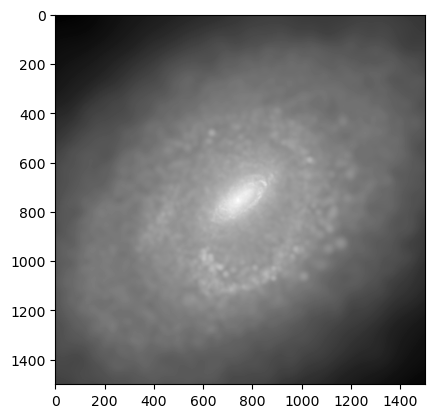

In [19]:
import matplotlib.pyplot as plt
plt.imshow(test[1].data[0], cmap= 'gist_gray_r')

In [ ]:
subhalos = [] #[[id,snap], [id,snap]]
FITS_dir = #location of images
    
    
for subhalo in subhalos:    
    img = FITS_dir + 'SFID_%07d_SNAP_%02d.fits' %(subhalo[0], subhalo[1])
    fig = plt.figure(figsize = (9,7))
    ax = fig.subplots(1,3)
    
    data = fits.open(image_list[i])[0].data

    for i in [1, 2, 3]:
        data = fits.open(img)[i].data
        ax[i-1].imshow(data, cmap = 'gist_gray_r')


    fig.suptitle('Subhalo ID = {}, Snapshot = {}'.format(subhalo[0], subhalo[1]))
    plt.tight_layout()